In [1]:
from __future__ import print_function
import morphs
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
for path in morphs.paths.NEUROMETRIC_NULL_DIR.glob('*.pkl'):
    num_shuffles = morphs.data.parse.num_shuffles(path)
    print(num_shuffles, path.name)

8 neurometric_null_dist_8.pkl
64 neurometric_null_dist_64.pkl
1024 neurometric_null_dist_1024.pkl
2048 neurometric_null_dist_2048.pkl


In [3]:
num_shuffles = 64

In [4]:
all_samples_df = morphs.load.neurometric_null_all(num_shuffles)

/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


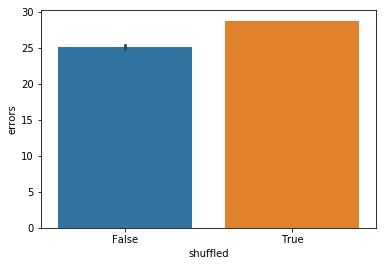

In [5]:
ax = sns.barplot(x='shuffled', y='errors', data=all_samples_df)

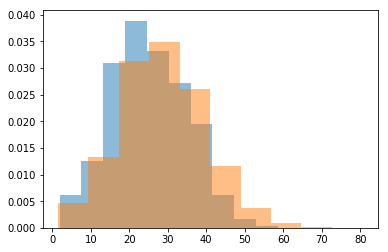

In [8]:
for shuffled, shuffled_group in all_samples_df.groupby('shuffled'):
    plt.hist(shuffled_group['errors'].values, alpha=.5, density=True)

In [6]:
import numpy as np

In [7]:
def plt_cum_dist(data, scaled=False, survival=False, label='Cumulative', **kwargs):
    data = np.sort(data)
    if survival:
        data = data[::-1]
    y = np.arange(data.size+1, dtype=float)
    if scaled:
        y /= y[-1]
    plt.step(np.concatenate([data, data[[-1]]]), y, label=label, **kwargs)

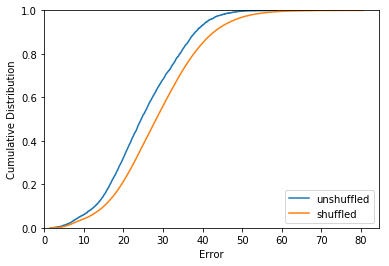

In [9]:
fig = plt.figure()
ax = plt.gca()
for shuffled, shuffled_group in all_samples_df.groupby('shuffled'):
    plt_cum_dist(shuffled_group['errors'].values, scaled=True, label='shuffled' if shuffled else 'unshuffled')
ax.set_ylim(0, 1)
ax.set_xlim(0, ax.get_xlim()[-1])
ax.set_ylabel('Cumulative Distribution')
ax.set_xlabel('Error')
ax.legend(loc='lower right');

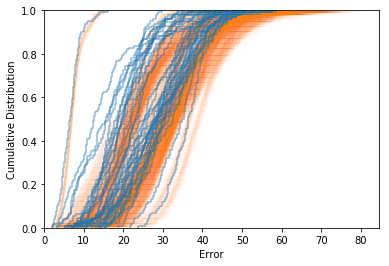

In [10]:
fig = plt.figure()
ax = plt.gca()
for shuffled, shuffled_group in all_samples_df.groupby('shuffled'):
    lines, = plt.plot(0, 0)
    color = lines.get_color()
    lines.remove()
    label = 'shuffled' if shuffled else 'unshuffled'
    alpha = .01 if shuffled else .5
    zorder = 1 if shuffled else 2
    for (shuffle_index, block), group in shuffled_group.groupby(['shuffle_index', 'block']):
        plt_cum_dist(group['errors'].values, scaled=True, label=label, color=color, alpha=alpha, zorder=zorder)
# plt.legend()
ax.set_ylim(0, 1)
ax.set_xlim(0, ax.get_xlim()[-1])
ax.set_ylabel('Cumulative Distribution')
ax.set_xlabel('Error');